In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [39]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
val_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
val_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
train_data_copy = train_data.copy()
val_data_copy = val_data.copy()

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [43]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import tensorflow as tf

# Reshape and visualize validation data

In [45]:
validation_arr= val_data.to_numpy()

validation_arr_shaped = np.reshape(validation_arr, (28000, 28, 28))

In [46]:
validation_arr_shaped.shape

(28000, 28, 28)

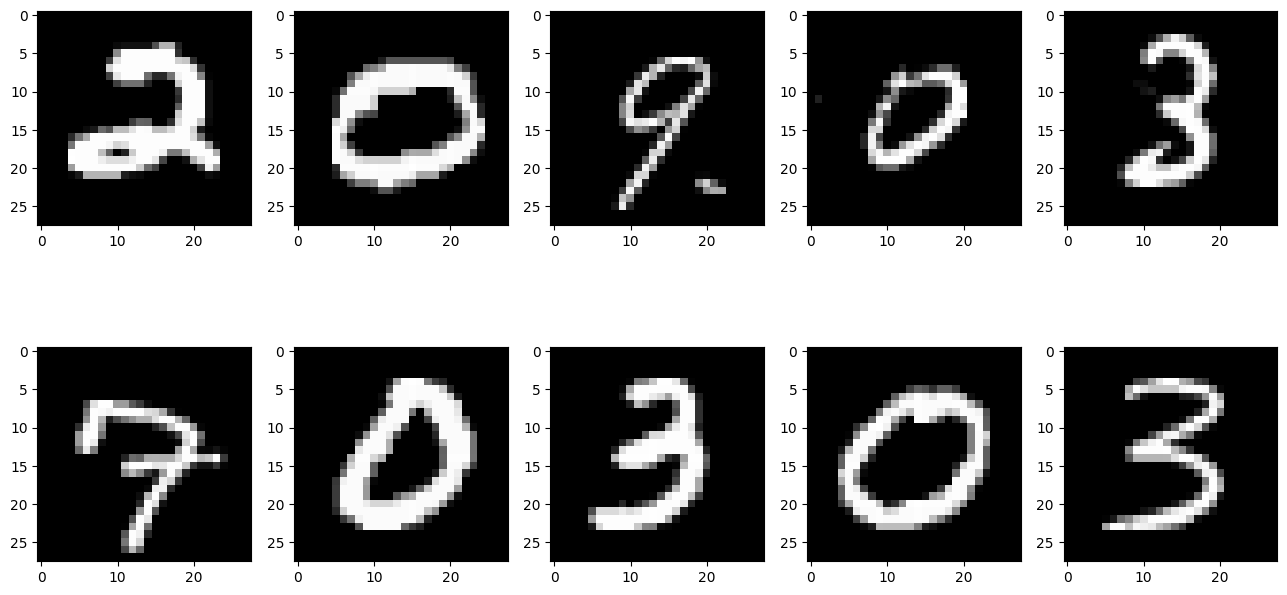

In [47]:
fig = plt.figure(figsize=(16, 8))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  ax.imshow(validation_arr_shaped[i], cmap=plt.get_cmap('gray'))
  #ax.set_title(y_train[i])
plt.show()

# Check, split and reshape train data

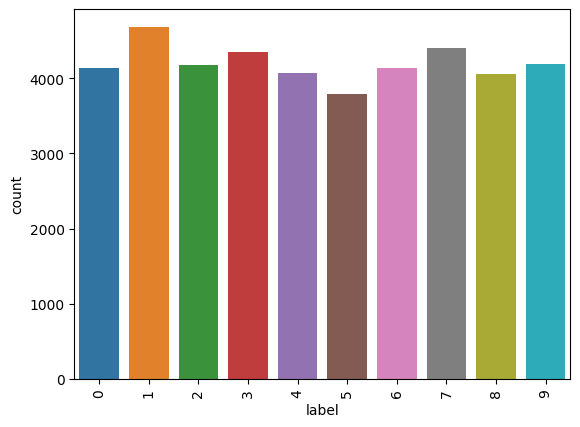

In [48]:
#Check for data imbalance
sns.countplot(x=train_data['label']);
plt.xticks(rotation = 'vertical');

In [49]:
pcnt = .8
train = train_data.sample(frac = pcnt, random_state = 14)
test = train_data.drop(train.index)

In [50]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
12514,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13069,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15808,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
y_train = train['label'].to_numpy()
y_test = test['label'].to_numpy()
print (len(y_train))
print (len(y_test))

33600
8400


In [53]:
print(y_train)

[9 5 2 ... 6 2 6]


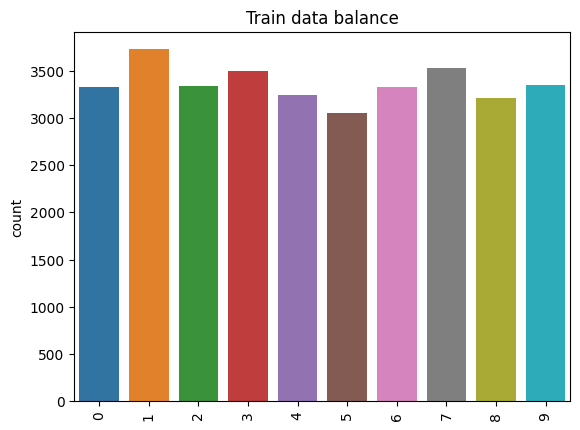

In [54]:
# check train and test data balance
# train
sns.countplot(x=y_train);
plt.xticks(rotation = 'vertical');
plt.title ('Train data balance')
plt.show()

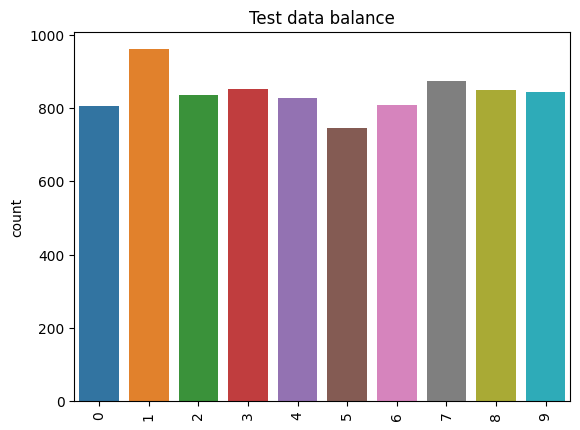

In [55]:
#test
sns.countplot(x=y_test);
plt.xticks(rotation = 'vertical');
plt.title ('Test data balance')
plt.show()

In [56]:
train = train.drop('label', axis=1)
test = test.drop('label', axis = 1)

In [57]:
train_arr= train.to_numpy()
X_train = np.reshape(train_arr, (33600, 28, 28))
X_train.shape

(33600, 28, 28)

In [58]:
print(y_train.shape)
print(y_test.shape)

(33600,)
(8400,)


In [59]:
test_arr= test.to_numpy()
X_test = np.reshape(test_arr, (8400, 28, 28))
X_test.shape

(8400, 28, 28)

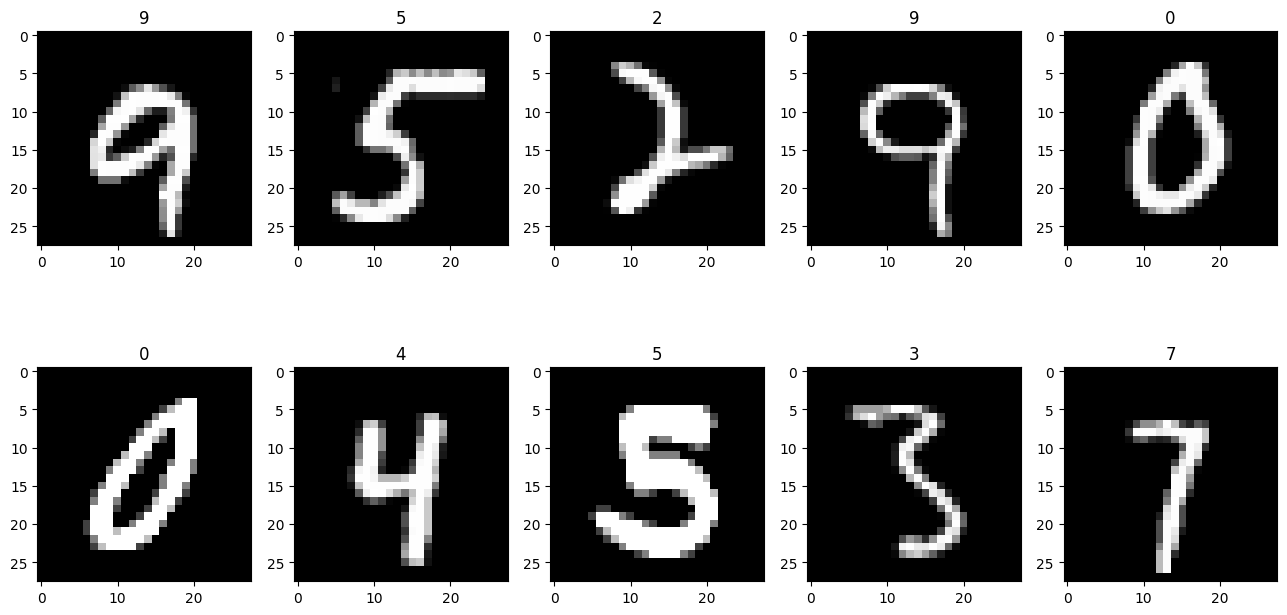

In [60]:
fig = plt.figure(figsize=(16, 8))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  ax.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  ax.set_title(y_train[i])
plt.show()

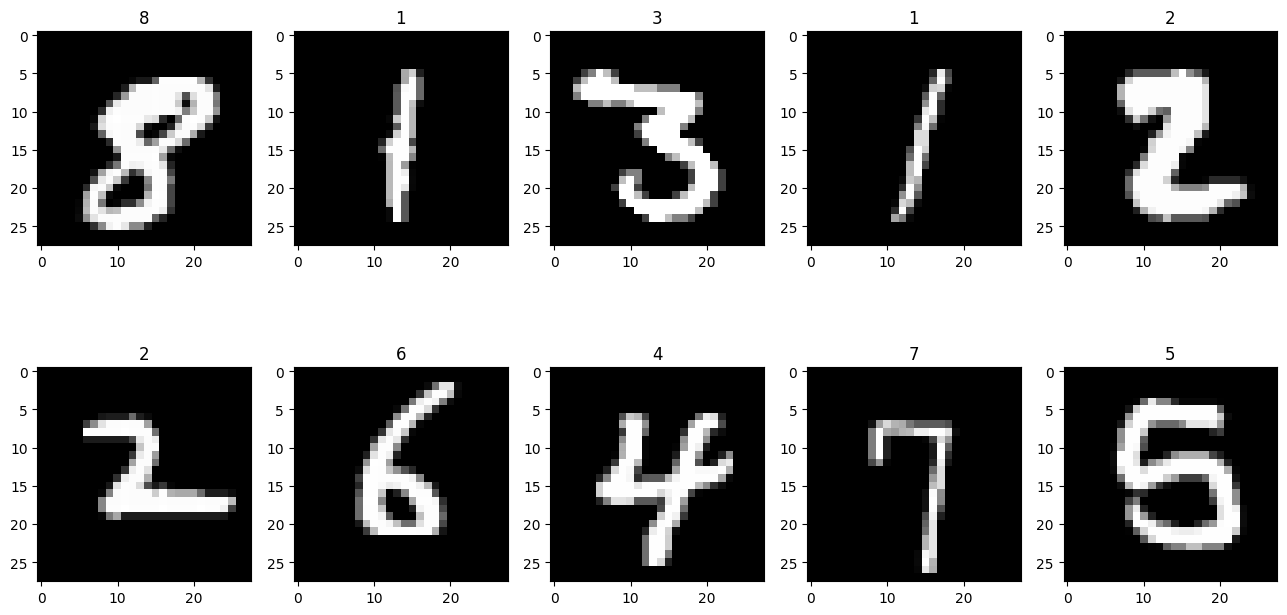

In [61]:
fig = plt.figure(figsize=(16, 8))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  ax.imshow(X_test[i], cmap=plt.get_cmap('gray'))
  ax.set_title(y_test[i])
plt.show()

# Normalize data

In [62]:
X_train.max()

255

In [63]:
X_test.max()

255

In [64]:
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [65]:
X_train_normalized.max()

1.0

In [66]:
X_test_normalized.max()

1.0

In [67]:
print ('X_train_normalized shape is', X_train_normalized.shape)
print ('X_test_normalized shape is', X_test_normalized.shape)

X_train_normalized shape is (33600, 28, 28)
X_test_normalized shape is (8400, 28, 28)


# One-hot encode output

In [68]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

# Fix the seed

In [69]:
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Build CNN model

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras import backend

In [71]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [72]:
# Intializing a sequential model
model_final= Sequential()
#First Convolutional layer with 16 filters and the kernel size of 3x3. Use the 'same' padding and provide the input shape = (64, 64, 3)
model_final.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (28, 28, 1)))
#Add a LeakyRelu layer with the slope equal to 0.1
model_final.add(LeakyReLU(0.1))
#Second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
model_final.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "same"))
#Add LeakyRelu with the slope equal to 0.1
model_final.add(LeakyReLU(0.1))
#Add a max-pooling layer with a pool size of 2x2
model_final.add(MaxPooling2D(pool_size = (2, 2)))
#Add a BatchNormalization layer
model_final.add(BatchNormalization())
#Third Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
model_final.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "same"))
#Add a LeakyRelu layer with the slope equal to 0.1
model_final.add(LeakyReLU(0.1))
#Fourth Convolutional layer 64 filters and the kernel size of 3x3 with 'same' padding
model_final.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same"))
#Add a LeakyRelu layer with the slope equal to 0.1
model_final.add(LeakyReLU(0.1))
#Add a max-pooling layer with a pool size of 2x2
model_final.add(MaxPooling2D(pool_size = (2, 2)))
#Add a BatchNormalization layer
model_final.add(BatchNormalization())
#Third Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
model_final.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "same"))
#Add a LeakyRelu layer with the slope equal to 0.1
model_final.add(LeakyReLU(0.1))
#Fourth Convolutional layer 64 filters and the kernel size of 3x3 with 'same' padding
model_final.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same"))
#Add a LeakyRelu layer with the slope equal to 0.1
model_final.add(LeakyReLU(0.1))
#Add a max-pooling layer with a pool size of 2x2
model_final.add(MaxPooling2D(pool_size = (2, 2)))
#Add a BatchNormalization layer
model_final.add(BatchNormalization())
#Flatten the output from the previous layer
model_final.add(Flatten())
#Add a dense layer with 32 nodes
model_final.add(Dense(32))
#Add a LeakyRelu layer with the slope equal to 0.1
model_final.add(LeakyReLU(0.1))
#Add a dropout layer with the rate equal to 0.5
model_final.add(Dropout(0.5))
#Add the final output layer with nodes equal to the number of classes, i.e., 2 and 'softmax' as the activation function
model_final.add(Dense(10, activation = 'softmax'))

In [73]:
#Compile
opt = Adam(learning_rate=0.0005)

model_final.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generating the summary of the model
model_final.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                         

In [74]:
# Fit the model on train data
history = model_final.fit(
            X_train_normalized, y_train_encoded,
            epochs=20,
            validation_split=0.2,
            shuffle=True,
            batch_size=64,
            verbose=1
)
     

Epoch 1/20
420/420 [==============================] - 45s 101ms/step - loss: 0.4624 - accuracy: 0.8573 - val_loss: 1.0842 - val_accuracy: 0.5802
Epoch 2/20
420/420 [==============================] - 42s 100ms/step - loss: 0.1466 - accuracy: 0.9609 - val_loss: 0.0471 - val_accuracy: 0.9850
Epoch 3/20
420/420 [==============================] - 43s 102ms/step - loss: 0.1003 - accuracy: 0.9739 - val_loss: 0.0397 - val_accuracy: 0.9868
Epoch 4/20
420/420 [==============================] - 42s 100ms/step - loss: 0.0776 - accuracy: 0.9782 - val_loss: 0.0449 - val_accuracy: 0.9869
Epoch 5/20
420/420 [==============================] - 42s 101ms/step - loss: 0.0622 - accuracy: 0.9830 - val_loss: 0.0335 - val_accuracy: 0.9900
Epoch 6/20
420/420 [==============================] - 42s 101ms/step - loss: 0.0530 - accuracy: 0.9855 - val_loss: 0.0273 - val_accuracy: 0.9920
Epoch 7/20
420/420 [==============================] - 43s 103ms/step - loss: 0.0487 - accuracy: 0.9874 - val_loss: 0.0489 - val_ac

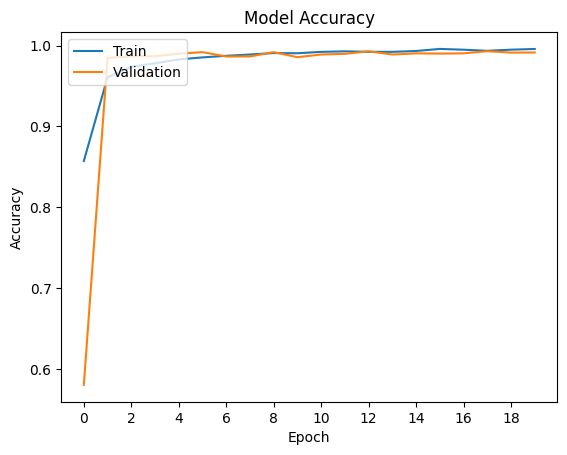

In [75]:
# Create a plot of history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(0,20,2))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [76]:
#predict test data
y_pred=model_final.predict(X_test_normalized)
model_final.evaluate(X_test_normalized, y_test_encoded, verbose = 1)

263/263 [==============================] - 4s 16ms/step - loss: 0.0529 - accuracy: 0.9894


[0.052929412573575974, 0.9894047379493713]

In [77]:
# Create label
y_pred_label=np.argmax(y_pred,axis=1)
y_test_label=np.argmax(y_test_encoded,axis=1)

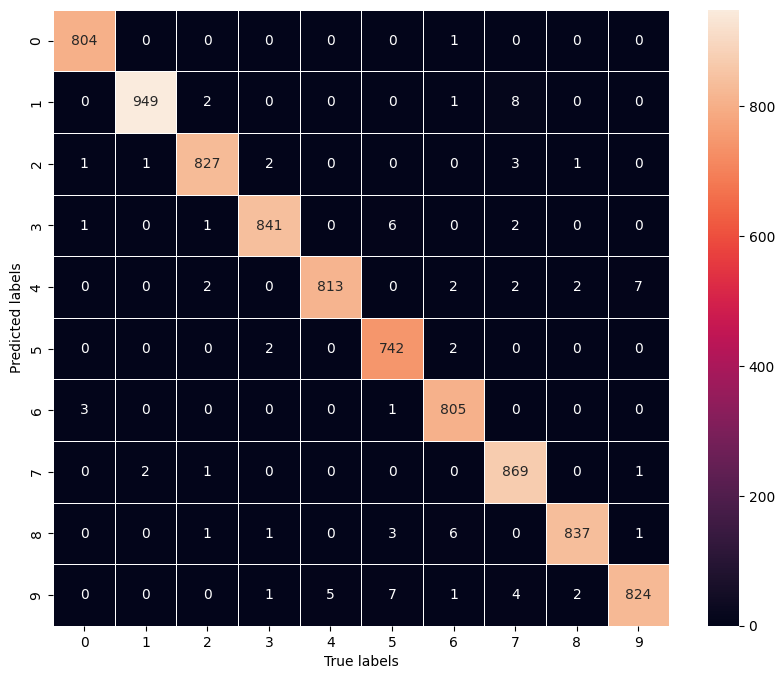

In [78]:
# Plot the results of test data
confusion_matrix = tf.math.confusion_matrix(y_test_label,y_pred_label)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
ax.set_ylabel('Predicted labels');ax.set_xlabel('True labels');
plt.show()

In [79]:
print(classification_report(y_test_label,y_pred_label))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       805
           1       1.00      0.99      0.99       960
           2       0.99      0.99      0.99       835
           3       0.99      0.99      0.99       851
           4       0.99      0.98      0.99       828
           5       0.98      0.99      0.99       746
           6       0.98      1.00      0.99       809
           7       0.98      1.00      0.99       873
           8       0.99      0.99      0.99       849
           9       0.99      0.98      0.98       844

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



# Validation data

In [89]:
X_val_normalized = validation_arr_shaped.astype('float32')/255.0

In [90]:
predictions = model_final.predict(X_val_normalized)
predictions_label=np.argmax(predictions,axis=1)


875/875 [==============================] - 14s 16ms/step


In [91]:
output = pd.DataFrame(columns=['ImageId','Label'])
output['Label'] = predictions_label
output['ImageId'] = np.arange(len(output))
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [92]:
output.head()

,ImageId,Label
0,0,2
1,1,0
2,2,9
3,3,0
4,4,3


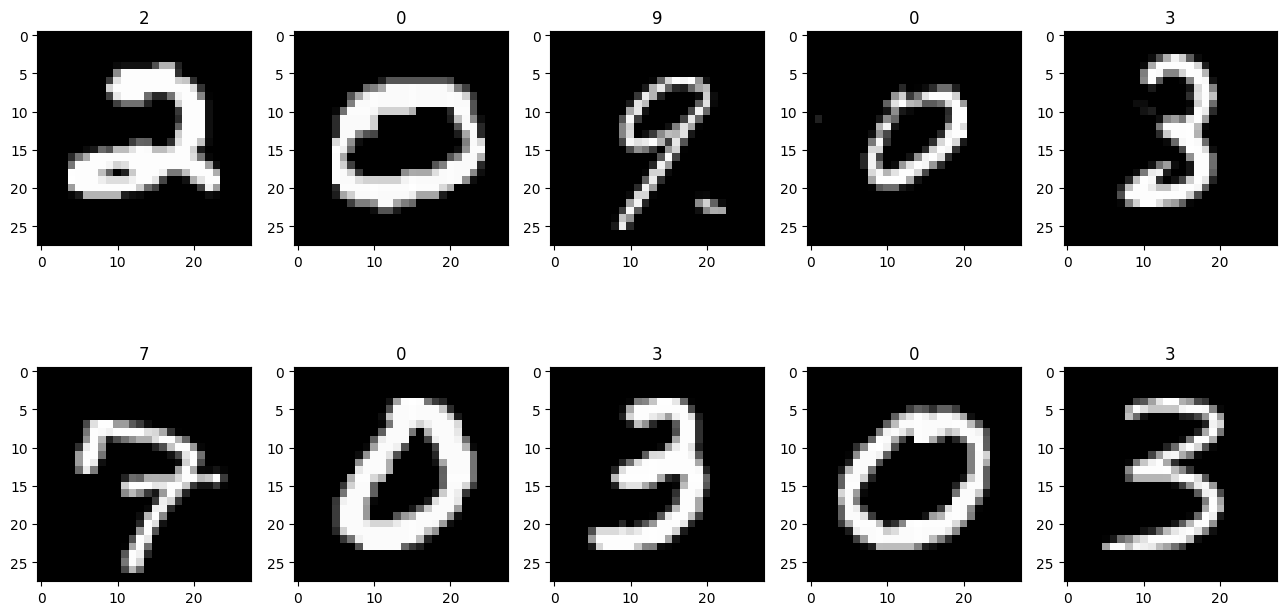

In [94]:
fig = plt.figure(figsize=(16, 8))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  ax.imshow(X_val_normalized[i], cmap=plt.get_cmap('gray'))
  ax.set_title(output['Label'][i])
plt.show()